In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using StatsBase, Distributions, Plots, LinearAlgebra, Plots

In [3]:
using Revise

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 

In [4]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]


n_samples = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_samples, 1)
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_samples, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
  0.157457   0.107023
  0.188433   0.144204
  0.181935   0.177765
  0.0638292  0.181643
  0.294231   0.237765
  0.414389   0.212003
  0.266754   0.220271
  0.235443   0.191285
 -0.0384151  0.12967
  0.154121   0.0842628
  ⋮          
  0.145269   0.101353
  0.0631123  0.0803747
  0.0736091  0.045457
 -0.0893497  0.0367738
  0.0973727  0.091505
 -0.0606422  0.120302
  0.339932   0.134095
  0.07478    0.154064
  0.0738971  0.106341

In [194]:
Y = collect(test_returns[2:end,:])
T = n_samples
p = 1
X = hcat(ones(T-1), test_returns[p:end-1,:])
k= 2 #n_regimes
n_variables = 2

#Β = [randn(n_variables, n_variables+1) for _ in 1:k]

Β1 = [.06 .35 .25; .035 .2 .65]

Β2 = [-.05 .45 .15; .035 .15 .63]

Β = [Β1, Β2]

Σ1 = cor2cov([1 .1; .1 1], [.05, .02])
Σ2 = cor2cov([1 .5; .5 1], [.10, .05]) 
Σ = [Σ1, Σ2]

#Σ = rand(InverseWishart(4, [.001 0; 0 .015]),k)

#init_regimes = rand(k) 
#init_regimes = init_regimes ./ sum(init_regimes)

t_m = [.55 .45;.45 .55]

result = expectation_maximisation(Y, X, k, Β, Σ, t_m, 3)



MSVARResult([0.46631532497824807 0.5336846750217519; 0.26117999115754686 0.7388200088424531; … ; 4.238713964432911e-5 0.9999576128603557; 0.010770878425046424 0.9892291215749536], [0.4669869474141742 0.5330130525858271; 0.2646777481444074 0.7353222518555939; … ; 4.3138109148714304e-5 0.9999568618908512; 0.010770878425046424 0.9892291215749536], [0.17846804300720281 0.8215319569927971; 0.22758310985922167 0.7724168901407784], Any[[0.18010958691433748 0.6481786242615994 0.5243280231756041; 0.037227835362059467 0.30582774741354796 1.107955709002048], [-0.062203905481420935 0.38083727634493664 0.33609207016567993; 0.03801166284705956 0.12156492384792128 0.625183175915834]], Any[[0.006385016225086542 0.00030590703479776364; 0.0003059070347977636 0.0012900903155742714], [0.029479583017140522 0.0026327743823879608; 0.0026327743823879608 0.001527688222791263]], [2196.0843530433344, 2101.48225483853, 2150.3219747876487])

In [195]:
round.(result.regimes, digits=4)

999×2 Matrix{Float64}:
 0.4663  0.5337
 0.2612  0.7388
 0.0023  0.9977
 0.8446  0.1554
 0.0097  0.9903
 0.0005  0.9995
 0.0021  0.9979
 0.0     1.0
 0.535   0.465
 0.6147  0.3853
 ⋮       
 0.6305  0.3695
 0.0068  0.9932
 0.0914  0.9086
 0.0005  0.9995
 0.4954  0.5046
 0.0011  0.9989
 0.355   0.645
 0.0     1.0
 0.0108  0.9892

In [196]:
round.(result.smoothed_regimes, digits=4)

999×2 Matrix{Float64}:
 0.467   0.533
 0.2647  0.7353
 0.0022  0.9978
 0.8469  0.1531
 0.0099  0.9901
 0.0005  0.9995
 0.0021  0.9979
 0.0     1.0
 0.5305  0.4695
 0.619   0.381
 ⋮       
 0.6346  0.3654
 0.0069  0.9931
 0.0929  0.9071
 0.0005  0.9995
 0.5     0.5
 0.0011  0.9989
 0.3592  0.6408
 0.0     1.0
 0.0108  0.9892

In [197]:
all(result.smoothed_regimes .> 0)

true

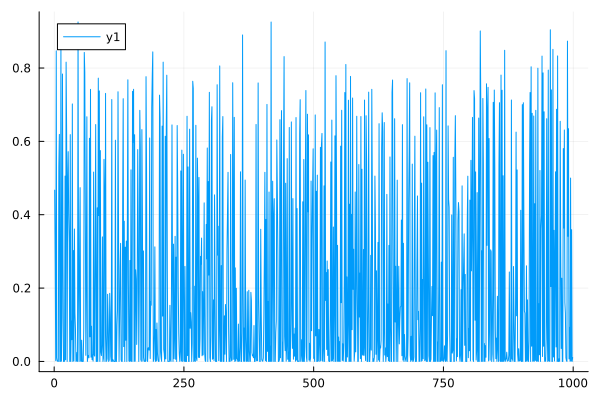

In [198]:
plot(result.smoothed_regimes[:,1])

In [199]:
result.Β


2-element Vector{Any}:
 [0.18010958691433748 0.6481786242615994 0.5243280231756041; 0.037227835362059467 0.30582774741354796 1.107955709002048]
 [-0.062203905481420935 0.38083727634493664 0.33609207016567993; 0.03801166284705956 0.12156492384792128 0.625183175915834]

In [200]:
result.Σ

2-element Vector{Any}:
 [0.006385016225086542 0.00030590703479776364; 0.0003059070347977636 0.0012900903155742714]
 [0.029479583017140522 0.0026327743823879608; 0.0026327743823879608 0.001527688222791263]

In [201]:
result.transition_matrix

2×2 Matrix{Float64}:
 0.178468  0.821532
 0.227583  0.772417

In [202]:
sum(result.transition_matrix, dims=2)

2×1 Matrix{Float64}:
 1.0
 1.0

In [203]:
l = result.likehoods

3-element Vector{Float64}:
 2196.0843530433344
 2101.48225483853
 2150.3219747876487

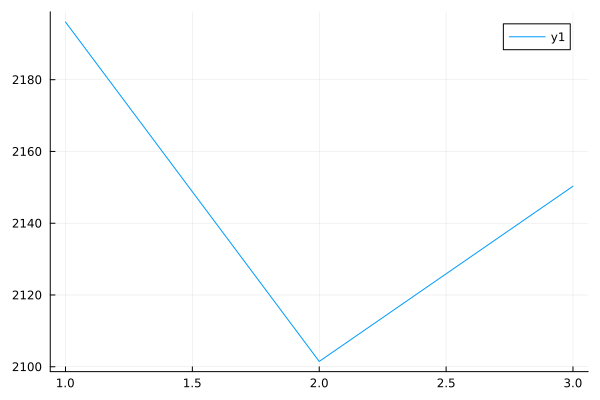

In [204]:
plot(l)

In [205]:
init_regimes =  initial_regimes_probs(result.transition_matrix)

2-element Vector{Float64}:
 0.21692864495989833
 0.7830713550401016

In [206]:
log_likehood(Y,X,result.Β, result.Σ, result.transition_matrix, init_regimes)

2150.3119185206724 + 0.0im

- zwraca transition matrix ktorej warotsci nie sumuja si edo jedngo
- dziwne wartosci coefficients
- zwraca regime probs, gdzie regime 1 jest cały czas jeden
- przetestowac transition matrix, gdy regime probs sa 1 0, rozne kombinacje

In [207]:
init_regimes = initial_regimes_probs(result.transition_matrix)
jr = joined_regimes_probs(result.regimes, result.smoothed_regimes, init_regimes, result.transition_matrix)
#sum(jr, dims=2)

999×4 Matrix{Float64}:
 0.0387706    0.17847      0.17799      0.604096
 0.107617     0.15706      0.354193     0.381129
 0.000476051  0.00171724   0.27265      0.725157
 0.00150341   0.845392     0.000368395  0.152736
 0.00800335   0.00187779   0.844098     0.146021
 4.01969e-6   0.000523038  0.0103105    0.989162
 8.55991e-7   0.00210767   0.000549367  0.997342
 1.24312e-11  7.63996e-9   0.002202     0.997798
 3.2234e-9    0.530497     3.8692e-9    0.469503
 0.293611     0.32542      0.209648     0.171321
 ⋮                                      
 0.185797     0.448841     0.131371     0.233992
 0.00394446   0.00294769   0.640306     0.352801
 0.000496371  0.092389     0.00656218   0.900552
 3.78208e-5   0.00047963   0.0965661    0.902916
 0.000205069  0.499747     0.000278146  0.49977
 0.00049112   0.000637845  0.510258     0.488613
 0.000318846  0.358854     0.000771317  0.640056
 1.30055e-5   3.01326e-5   0.369223     0.630734
 3.58022e-7   0.0107705    4.45967e-5   0.989185

In [208]:
est_r = est_transition_matrix(jr[1:end,:], result.regimes[2:end,:], init_regimes)


MethodError: MethodError: no method matching est_transition_matrix(::Matrix{Float64}, ::Matrix{Float64}, ::Vector{Float64})
The function `est_transition_matrix` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  est_transition_matrix(::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\src\ESGModels\msvar.jl:112


In [209]:
sum(est_r, dims=2)

UndefVarError: UndefVarError: `est_r` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [210]:
r = [.9 .1; .8 .2; .85 .15]


3×2 Matrix{Float64}:
 0.9   0.1
 0.8   0.2
 0.85  0.15